In [1]:
import random
import torch
from torch import nn,optim
import math
from IPython import display 

In [2]:
from res.plot_lib import plot_data, plot_model, set_default

In [3]:
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [7]:
# Generating data .....
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000 # Num of samples
D = 2 # Dimensions
C = 5 # classes

In [15]:
X = torch.zeros(N*C,D).to(device)
y = torch.zeros(N*C , dtype = torch.long).to(device)

for c in range(C):
    
    index = 0
    t = torch.linspace(0,1,N)
    
    inner_var = torch.linspace(
        # When t = 0
        (2 * math.pi / C) * (c),
        # When t = 1
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N*c , N*(c+1)):
        X[ix] = t[index]* torch.FloatTensor((
            math.sin(inner_var[index]),math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1
        
print("Thus shapes are:")
print("X shape:",tuple(X.size()))
print("y shape:",tuple(y.size()))

Thus shapes are:
X shape: (5000, 2)
y shape: (5000,)


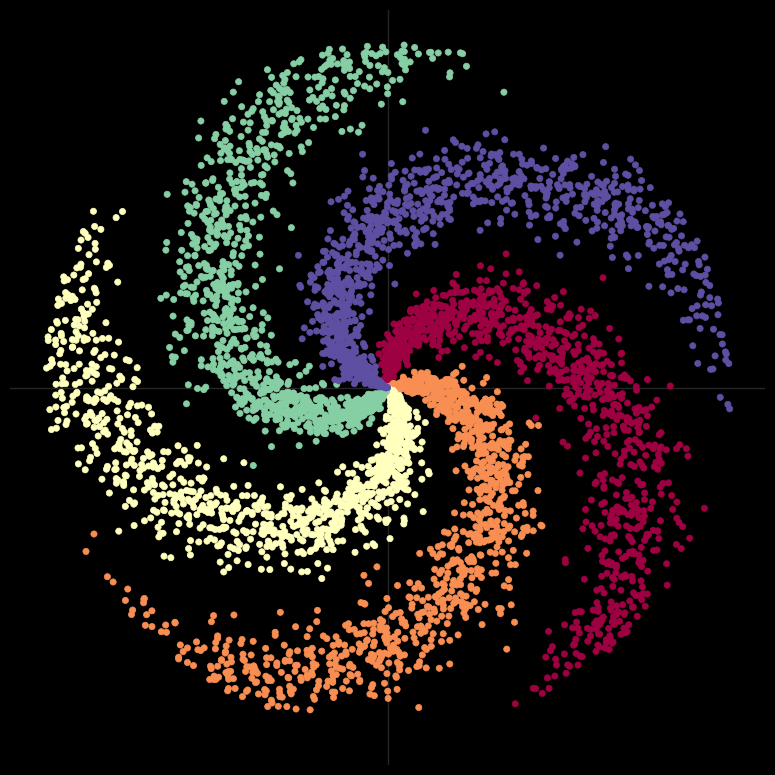

In [16]:
plot_data(X,y)

In [17]:
# Linear model

In [40]:
learning_rate = 1e-3
lambda_l2 = 1e-5
max_iters = 1000
H = 1000

In [53]:
model = nn.Sequential(
    nn.Linear(D,H),
    nn.Linear(H,C)
)
model.to(device) #into CUDA

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate,weight_decay=lambda_l2)

#training

for t in range(max_iters):
    
    # Feed-forward
    y_pred = model(X)
    
    # loss and accuracy
    loss = criterion(y_pred,y)
    score, predicted = torch.max(y_pred,1)
    acc = (y == predicted).sum().float()/len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # Make grads zeros before running backpass
    optimizer.zero_grad()
    
    #backpass
    loss.backward()
    
    #update
    optimizer.step()
    

[EPOCH]: 999, [LOSS]: 0.909231, [ACCURACY]: 0.492


Sequential(
  (0): Linear(in_features=2, out_features=1000, bias=True)
  (1): Linear(in_features=1000, out_features=5, bias=True)
)


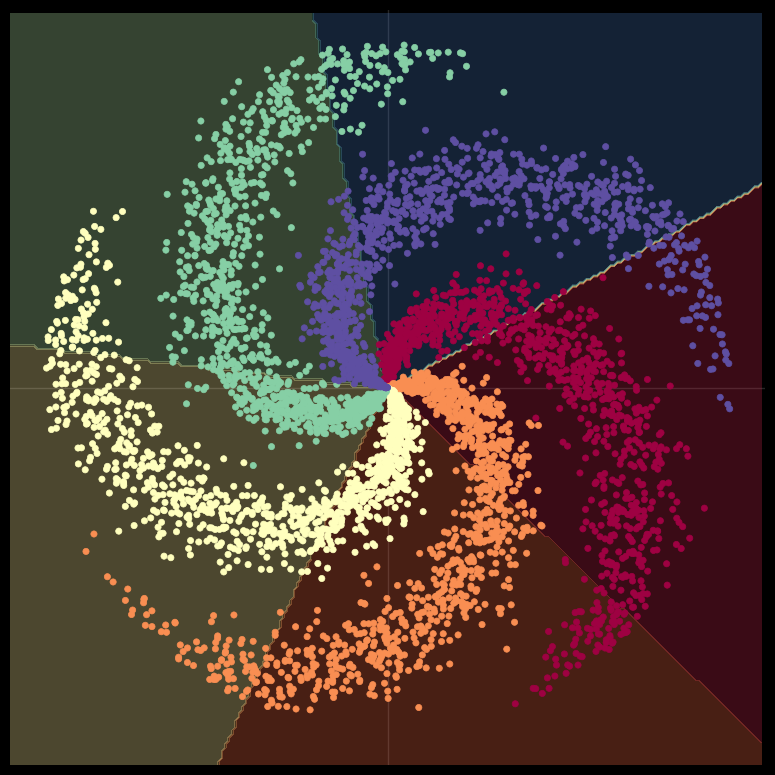

In [54]:
# Plotting model

print(model)
plot_model(X,y,model)

In [55]:
# Two layer Network

In [56]:
learning_rate = 1e-3
lambda_l2 = 1e-5
max_iters = 1000
H = 1000

In [57]:
model = nn.Sequential(
    nn.Linear(D,H),
    nn.ReLU(),
    nn.Linear(H,C)
)

model.to(device)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate,weight_decay=lambda_l2)

#training

for t in range(max_iters):
    
    # Feed-forward
    y_pred = model(X)
    
    # loss and accuracy
    loss = criterion(y_pred,y)
    score, predicted = torch.max(y_pred,1)
    acc = (y == predicted).sum().float()/len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # Make grads zeros before running backpass
    optimizer.zero_grad()
    
    #backpass
    loss.backward()
    
    #update
    optimizer.step()


[EPOCH]: 999, [LOSS]: 0.068289, [ACCURACY]: 0.996


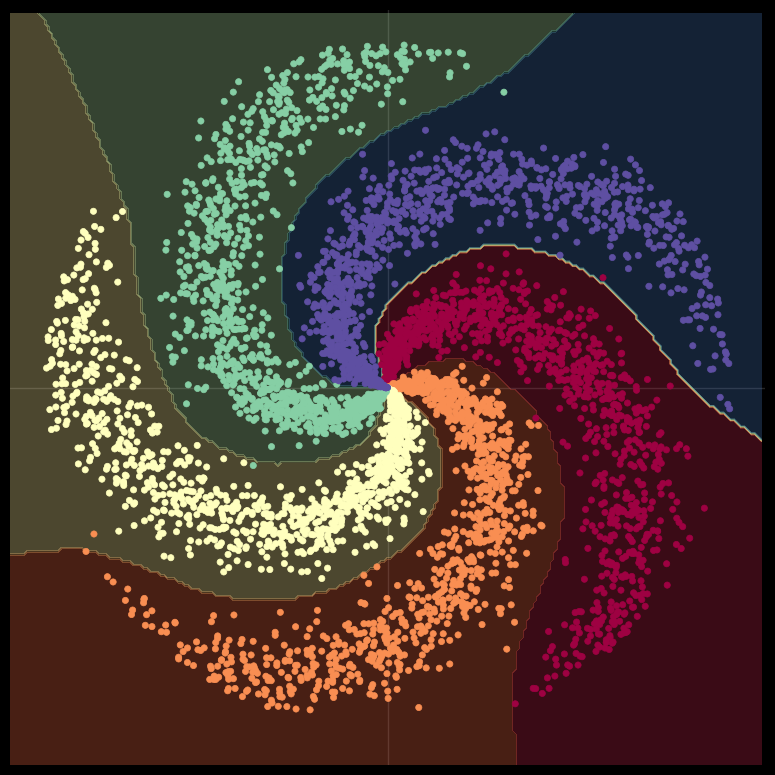

In [58]:
plot_model(X,y,model)